In [1]:
# import libraries
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# defining the lambda function
pysqldf = lambda q: sqldf(q, globals())

In [2]:
data = pd.read_csv("./data/nigeria_houses_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [3]:
query = 'SELECT * FROM data LIMIT 20'
head = pysqldf(query)
head

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


### Exploratory Data Analysis

In [4]:
query = 'SELECT title as "Types of Houses", COUNT(title) as "Total" FROM data GROUP BY title ORDER BY title ASC'
title = pysqldf(query)
title

,Types of Houses,Total
0,Block of Flats,1745
1,Detached Bungalow,2108
2,Detached Duplex,13992
3,Semi Detached Bungalow,452
4,Semi Detached Duplex,2615
5,Terraced Bungalow,177
6,Terraced Duplexes,3237


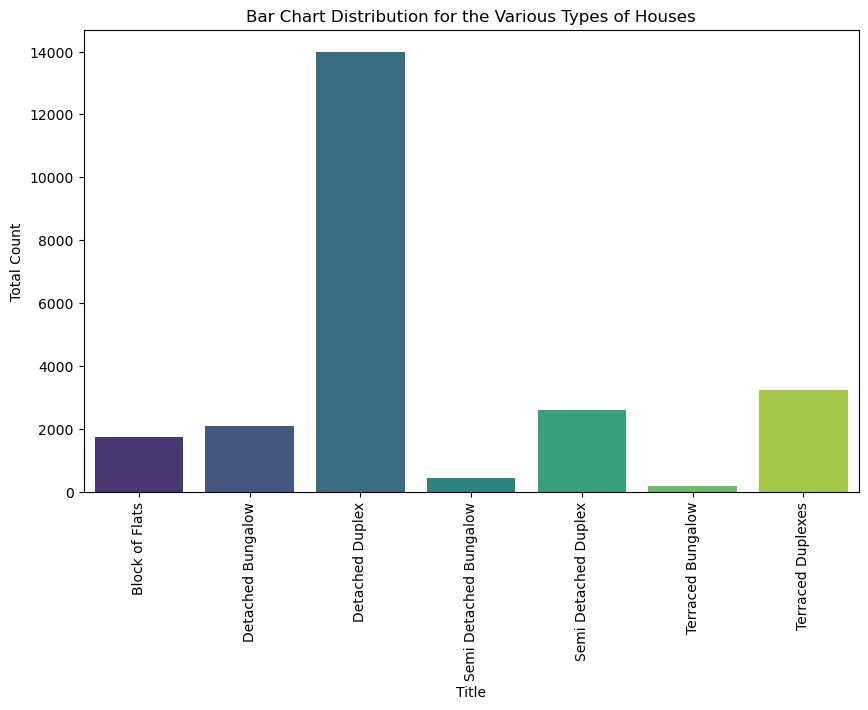

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=title, x='Types of Houses', y='Total', palette='viridis')

# Set plot labels and title
plt.xlabel('Title')
plt.ylabel('Total Count')
plt.title('Bar Chart Distribution for the Various Types of Houses')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

The result above provides information on the number of various types of houses contained in the dataset. The Detached Duplex is the most common type with 13,992 units, followed by the Detached Bungalow with 2,108 units. Semi-Detached Duplexes and Terraced Duplexes are also fairly common, with 2,615 and 3,237 units, respectively. In contrast, the Block of Flats is the least common type, totaling 1,745 units. Other types include the Semi Detached Bungalow with 452 units and the Terraced Bungalow with 177 units.

In [6]:
query = 'SELECT state as State, COUNT(state) as "Total No. of Properties" FROM data GROUP BY state'
state = pysqldf(query)
state

,State,Total No. of Properties
0,Abia,9
1,Abuja,3524
2,Akwa Ibom,25
3,Anambara,145
4,Bayelsa,2
5,Borno,2
6,Cross River,2
7,Delta,63
8,Edo,100
9,Ekiti,9


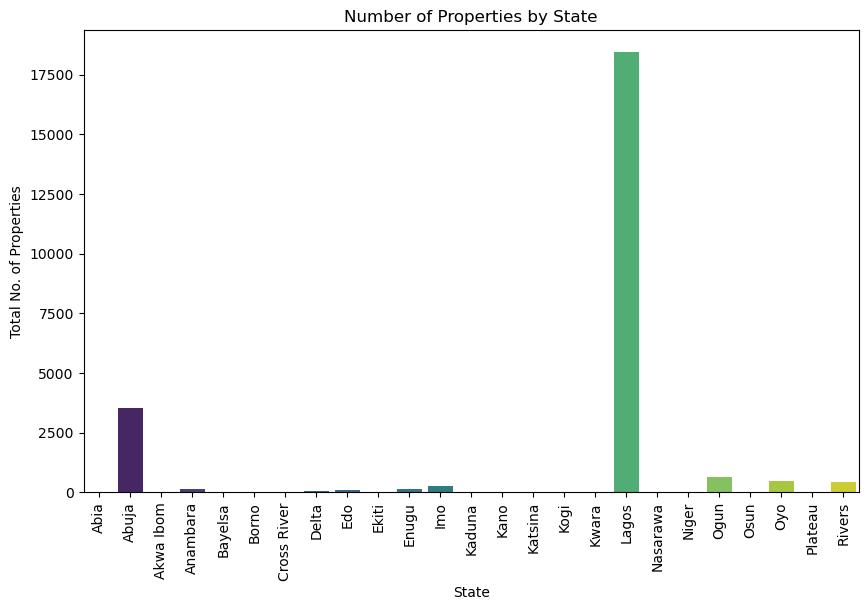

In [7]:
# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=state, x='State', y='Total No. of Properties', palette='viridis')

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Total No. of Properties')
plt.title('Number of Properties by State')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

The dataset provides information on the total number of properties across different states. Lagos has the highest number of properties with 18,445 units, followed by Abuja with 3,524 units. Ogun and Oyo also have a significant number of properties, totaling 637 and 477, respectively. Other states with notable property counts include Rivers (444), Imo (246), and Anambara (145). Conversely, several states have very few properties, with Bayelsa, Borno, Cross River, Kano, Katsina, and Plateau each having only 2 properties, and Niger having the least with just 1 property.

In [8]:
query = 'SELECT state as State, Min(price) as "Min. Price", Max(price) as "Max. Price" FROM data GROUP BY state ORDER BY state'
var_price = pysqldf(query)
var_price

,State,Min. Price,Max. Price
0,Abia,19000000.0,3.500000e+08
1,Abuja,110000.0,8.500000e+10
2,Akwa Ibom,10000000.0,1.400000e+08
3,Anambara,6500000.0,1.400000e+09
4,Bayelsa,20000000.0,1.600000e+08
5,Borno,105000000.0,1.050000e+08
6,Cross River,25000000.0,2.500000e+07
7,Delta,4500000.0,1.500000e+09
8,Edo,3000000.0,2.700000e+08
9,Ekiti,15000000.0,1.500000e+08


The dataset outlines the minimum and maximum prices of properties across various states. Key insights include:

**Lagos:** Shows the widest price range with a minimum of ₦90,000 and a maximum of ₦1.8 trillion. <br>
**Abuja:** Also has a significant range, with prices from ₦110,000 to ₦85 billion. <br>
**Bayelsa and Cross River:** Both have narrower ranges, with Bayelsa prices between ₦20 million and ₦160 million, and Cross River prices fixed at ₦25 million. <br>
**Borno:** Has a unique case with both minimum and maximum prices set at ₦105 million. <br>
**Niger:** Also displays fixed prices, both at ₦40 million since the dataset accounts for only one property in the state. <br>
**Enugu and Imo:** Show significant ranges with maximum prices at ₦320 million and ₦300 million, respectively. <br>
**Rivers:** Has a wide price range from ₦6 million to ₦4 billion. <br>
**Delta and Oyo:** Have relatively large ranges, with Delta from ₦4.5 million to ₦1.5 billion, and Oyo from ₦1.4 million to ₦350 million. 

To further investigate the outlier, we'll narrow down our exploratory analysis Lagos state.

In [9]:
query = 'SELECT town, price FROM data WHERE state = "Lagos" ORDER BY town'
lagos = pysqldf(query)

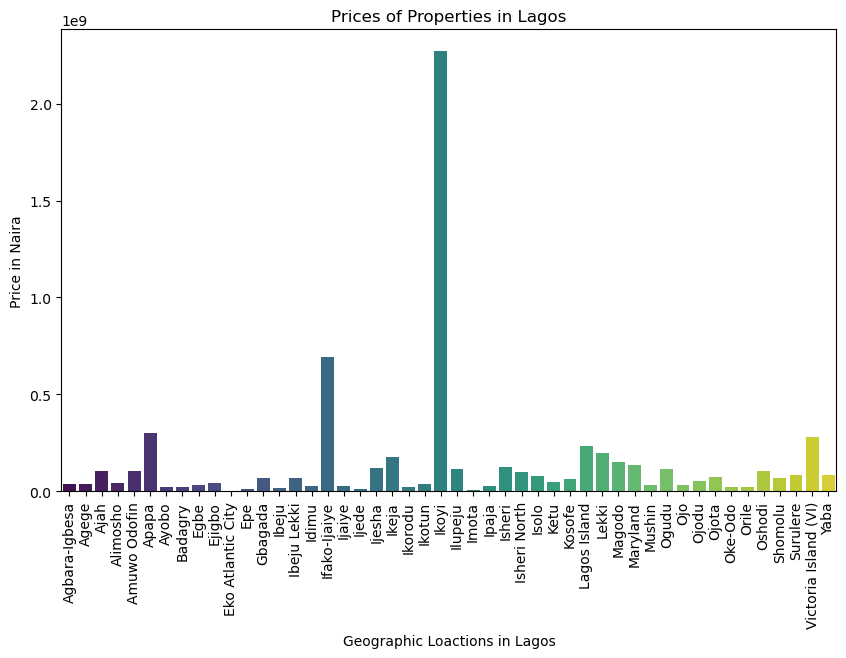

In [10]:
# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=lagos, x='town', y='price', palette='viridis', ci=None)

# Set plot labels and title
plt.xlabel('Geographic Loactions in Lagos')
plt.ylabel('Price in Naira')
plt.title('Prices of Properties in Lagos')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [11]:
query = 'SELECT town, Min(price) as "Min. Price", Max(price) as "Max. Price" FROM data WHERE state = "Lagos" GROUP BY town'
range_lagos = pysqldf(query)
range_lagos

,town,Min. Price,Max. Price
0,Agbara-Igbesa,13000000.0,7.500000e+07
1,Agege,3800000.0,1.850000e+08
2,Ajah,1000000.0,5.000000e+10
3,Alimosho,5000000.0,1.500000e+08
4,Amuwo Odofin,18000000.0,2.500000e+08
5,Apapa,20000000.0,7.500000e+08
6,Ayobo,3600000.0,5.500000e+07
7,Badagry,4000000.0,5.000000e+07
8,Egbe,35000000.0,3.500000e+07
9,Ejigbo,12000000.0,1.200000e+08


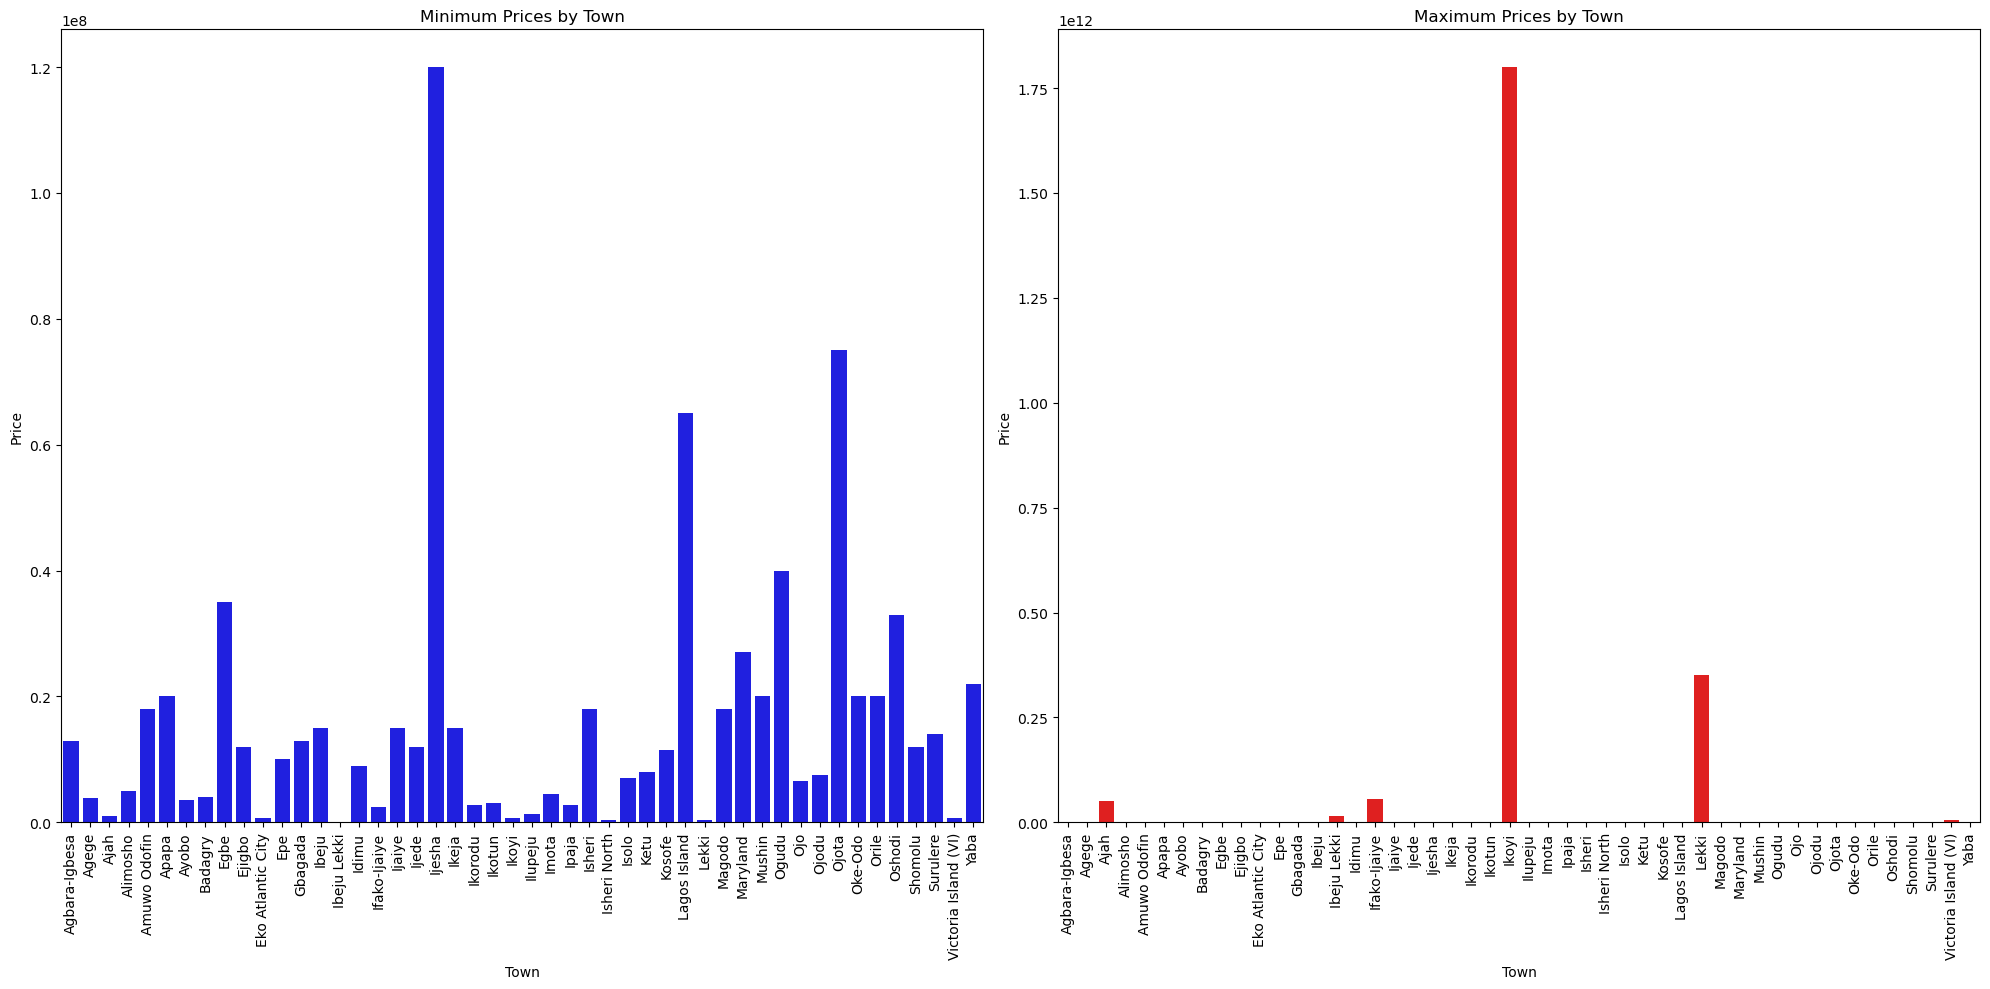

In [12]:
# Melt the DataFrame for easier plotting with Seaborn
lagos_melted = range_lagos.melt(id_vars='town', var_name='Price Type', value_name='Price')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot for Minimum Prices
sns.barplot(x='town', y='Price', data=lagos_melted[lagos_melted['Price Type'] == 'Min. Price'], ax=axes[0], color='b')
axes[0].set_title('Minimum Prices by Town')
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Maximum Prices
sns.barplot(x='town', y='Price', data=lagos_melted[lagos_melted['Price Type'] == 'Max. Price'], ax=axes[1], color='r')
axes[1].set_title('Maximum Prices by Town')
axes[1].set_xlabel('Town')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

The dataset shows the minimum and maximum prices of properties across various towns, with notable outliers indicating extreme price ranges. Here are some key observations:

**Extreme Highs:**
Lekki: Minimum price of ₦400,000 and a maximum of ₦350 billion. <br>
Ikoyi: Minimum price of ₦660,000 and a maximum of ₦1.8 trillion. <br>
Ajah: Minimum price of ₦1,000,000 and a maximum of ₦50 billion. <br>
Ibeju Lekki: Minimum price of ₦90,000 and a maximum of ₦15 billion. <br>
Ifako-Ijaiye: Minimum price of ₦2,500,000 and a maximum of ₦55 billion. <br>
Victoria Island (VI): Minimum price of ₦710,000 and a maximum of ₦6 billion. <br>

**Extreme Lows:**
Ijesha: Both minimum and maximum prices are ₦120 million, indicating a fixed pricing scenario. <br>
Egbe: Both minimum and maximum prices are ₦35 million, indicating another fixed pricing scenario. <br>
Imota: Minimum price of ₦4,500,000 and a maximum of ₦8,000,000. <br>
Ketu: Minimum price of ₦8,000,000 and a maximum of ₦95,000,000. <br>
Apapa: Minimum price of ₦20,000,000 and a maximum of ₦750,000,000. <br>

**Notable Ranges:**
Ikeja: Minimum price of ₦15,000,000 and a maximum of ₦1.44 billion. <br>
Maryland: Minimum price of ₦27,000,000 and a maximum of ₦1.4 billion. <br>
Agege: Minimum price of ₦3,800,000 and a maximum of ₦185 million. <br>
Gbagada: Minimum price of ₦13,000,000 and a maximum of ₦250 million. <br>
Surulere: Minimum price of ₦14,000,000 and a maximum of ₦350 million. <br>
These outliers and price ranges highlight the variability in property prices across different towns, reflecting differences in property values, demand, and other local factors.








In [13]:
query ='SELECT * FROM data WHERE price <= 8.00000e+09 ORDER BY state ASC'
filtered_data = pysqldf(query)

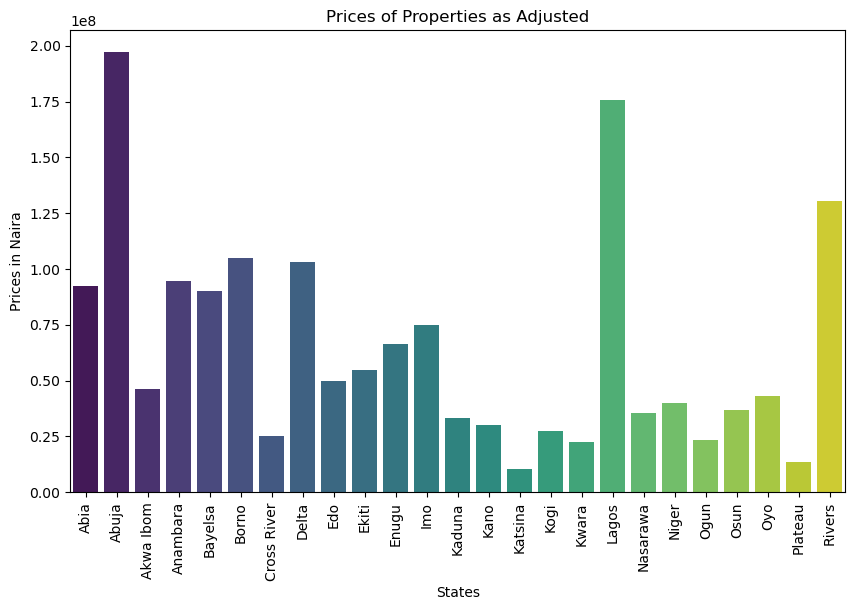

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='state', y='price', palette='viridis', ci=None)

# Set plot labels and title
plt.xlabel('States')
plt.ylabel('Prices in Naira')
plt.title('Prices of Properties as Adjusted')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [15]:
# Save DataFrame to CSV
filtered_data.to_csv('./data/filtered_data.csv', index=False)